In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
angle = pd.read_csv('angle.csv')
loss = pd.read_csv('losses.csv')
reward = pd.read_csv('rewards.csv')

In [11]:
angle.head()

,Wall time,Step,Value
0,1.621430e+09,1,0.235319
1,1.621430e+09,2,0.890998
2,1.621430e+09,3,1.832524
3,1.621430e+09,4,2.919611
4,1.621430e+09,5,4.038129


In [12]:
def EMA(data, alpha=0.3):
    result = []
    for i, datum in enumerate(data):
        if i == 0:
            result.append(datum)
        else:
            result.append(alpha*datum+(1-alpha)*result[-1])
    return result

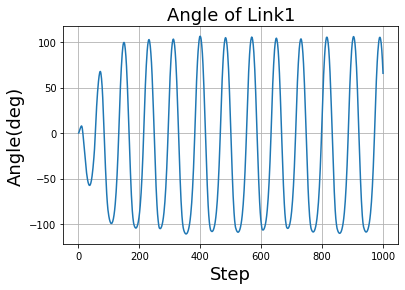

In [13]:
plt.plot(angle['Step'], angle['Value'])
plt.grid(True)
size = 18
plt.title('Angle of Link1', fontsize=size)
plt.xlabel('Step', fontsize=size)
plt.ylabel('Angle(deg)', fontsize=size)
plt.show()

In [14]:
loss['Value'][3]

130.17617797851562

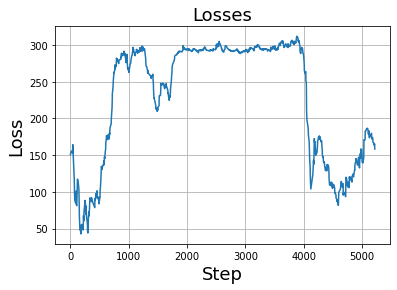

In [15]:
loss_value = EMA(loss['Value'], alpha=0.1)
plt.plot(loss['Step'], loss_value)
plt.grid(True)
size = 18
plt.title('Losses', fontsize=size)
plt.xlabel('Step', fontsize=size)
plt.ylabel('Loss', fontsize=size)
plt.show()

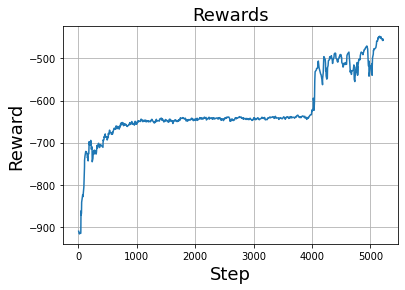

In [16]:
reward_value = EMA(reward['Value'], alpha=0.2)
size = 18
plt.plot(reward['Step'], reward_value)
plt.grid(True)
plt.title('Rewards', fontsize=size)
plt.xlabel('Step', fontsize=size)
plt.ylabel('Reward', fontsize=size)
plt.show()

In [105]:
def plot_fft(y):
    Ts = 0.025
    Fs = 1/Ts
    n = len(y)
    scale = n//10
    k = np.arange(n)
    T = n/Fs
    freq = k/T
    freq = freq[range(scale)]
    x = np.arange(n)*Ts
    fft_data = np.fft.fft(y)/n
    fft_data = fft_data[range(scale)]
    fft_mag_data = np.abs(fft_data)
    plt.figure(figsize=(5,3))
    plt.subplot(2,1,1)
    plt.title('FFT')
    plt.plot(x, y)
    plt.xlabel('sec')
    plt.ylabel('deg')
    plt.grid(True)

    plt.subplot(2,1,2)
    plt.grid(True)
    #plt.xlim([0.1, 25])
    plt.ylabel('mag')
    plt.xlabel('frequency')
    plt.plot(freq, fft_mag_data, linestyle=' ', marker='^', linewidth=1)
    plt.vlines(freq, [0], fft_mag_data)
    plt.show()
    print('most frequncy is ', freq[np.argmax(fft_mag_data)], 'Hz')
    sigma = np.max(fft_mag_data)/np.mean(fft_mag_data)
    print(sigma)

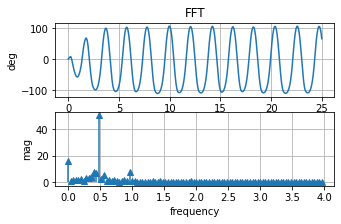

most frequncy is  0.48 Hz
33.64584602730001


In [108]:
plot_fft(angle['Value'])

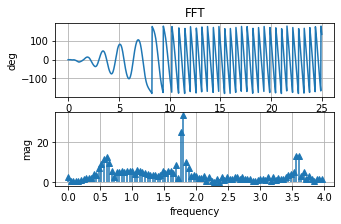

most frequncy is  1.8 Hz
8.095269096846703


In [109]:
angle_bad = pd.read_csv('angle_bad.csv')
plot_fft(angle_bad['Value'])

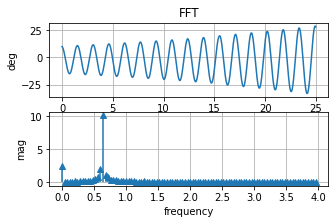

most frequncy is  0.64 Hz
38.05867827771603


In [110]:
angle_bad2 = pd.read_csv('angle_bad2.csv')
plot_fft(angle_bad2['Value']+10)

In [67]:
import time, os
print(type(time.localtime()))
start_time = time.strftime('%m-%d_%Hh-%Mm-%Ss', time.localtime())
print(start_time)

<class 'time.struct_time'>
05-29_23h-53m-24s


In [2]:
import datetime.datetime as dt
from pytz import timezone, utc

0:00:00.000076


In [ ]:
from datetime import datetime as dt
from pytz import timezone, utc
start_time = utc.localize(dt.utcnow()).astimezone(timezone('Asia/Seoul'))
end_time = utc.localize(dt.utcnow()).astimezone(timezone('Asia/Seoul'))
print(end_time - start_time)